# MDS

## Introduction

Nonmetric Multidimensional Scaling (NMDS) is a method used to represent high-dimensional data in a lower-dimensional space (usually 2D or 3D) while preserving the relative ordering (rank) of dissimilarities between points, rather than their exact numerical distances.


Advantages of NMDS:<br>
 * Preserves relative (rank-based) dissimilarities.
 * Works with any type of dissimilarity metric.
 * Flexible and interpretable visualization.

Disadvantages of NMDS<br>
* Computationally intensive for large datasets (due to iterative optimization).
* Sensitive to local minima (results depend on the starting configuration).
* Interpretation is limited to relative distances, not absolute distances.

In [1]:
import pandas as pd # python library for data manipulation
import numpy as np # python library for numerical computing
from sklearn.manifold import MDS # python library for MDS
import matplotlib.pyplot as plt # python library for plotting

## Step 1. Load The similarity data

The similarity matrix is read using `pandas.read_csv`. The `index_col=0` sets the first column as row labels (e.g., car names).

In [2]:
data = pd.read_csv('cars_similarity.csv', index_col=0) 
# remove index_col=0 if you want to keep the original index. 
# If the csv does not have a header than use `header=None` in the read_csv function

d = data.values  # distance matrix - extracting the similarity/dissimilarity as matrix using numpy array

In [3]:
# data 
data

,Mazda RX4,Mazda RX4 Wag,Ferrari Dino,Maserati Bora,Duster 360,Toyota Corona,Toyota Corolla,Honda Civic,Cadillac Fleetwood,Lincoln Continental
Mazda RX4,0,1,2,5,4,4,4,4,5,8
Mazda RX4 Wag,1,0,2,5,4,6,4,4,5,8
Ferrari Dino,2,2,0,3,5,6,6,5,6,6
Maserati Bora,5,5,3,0,5,8,8,8,5,5
Duster 360,4,4,5,5,0,5,7,7,2,3
Toyota Corona,4,6,6,8,5,0,3,4,6,6
Toyota Corolla,4,4,6,8,7,3,0,2,8,8
Honda Civic,4,4,5,8,7,4,2,0,8,8
Cadillac Fleetwood,5,5,6,5,2,6,8,8,0,1
Lincoln Continental,8,8,6,5,3,6,8,8,1,0


In [4]:
# distance matrix
print(d)

[[0 1 2 5 4 4 4 4 5 8]
 [1 0 2 5 4 6 4 4 5 8]
 [2 2 0 3 5 6 6 5 6 6]
 [5 5 3 0 5 8 8 8 5 5]
 [4 4 5 5 0 5 7 7 2 3]
 [4 6 6 8 5 0 3 4 6 6]
 [4 4 6 8 7 3 0 2 8 8]
 [4 4 5 8 7 4 2 0 8 8]
 [5 5 6 5 2 6 8 8 0 1]
 [8 8 6 5 3 6 8 8 1 0]]


## Step 2. Converting to Distance Matrix (Optional)

If the similarity data is not already in distance form (diagonals are not 0), you could use transformations like `1 - similarity` or apply `squareform` from `scipy.spatial.distance.`

In [5]:
# # Example similarity matrix
# similarity_matrix = np.array([[1, 0.8, 0.5],
#                                [0.8, 1, 0.3],
#                                [0.5, 0.3, 1]])

# # Convert similarity to distance
# dissimilarity_matrix = 1 - similarity_matrix

# # Perform NMDS
# mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
# embedding = mds.fit_transform(dissimilarity_matrix)

# print("Embedding:", embedding)


## Step 3. Performing MDS

* `MDS` from `sklearn.manifold` computes the embedding in the desired number of dimensions (`n_components=2` for 2D).<br>
* `dissimilarity='precomputed'` tells the MDS algorithm to use the input matrix as a precomputed dissimilarity matrix.

    Key points for the input matrix:<br>
    If you specify `dissimilarity='precomputed'` like in this case, ensure:<br>
    1. `Symmetry`: the matrix must be symmetric.
    2. `Zero Diagonal`: The diagonal must be zero.
    3. `Square matrix`: The matrix must have equal rwos and columns.

In [6]:
mds = MDS(n_components=2, max_iter=1000, dissimilarity='precomputed', random_state=42)
fit = mds.fit_transform(d)


c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


## Step 4. Extracting and Plotting Coordinates
The transformed coordinates are used for plotting with `matplotlib`. Each point is labeled using the row names from the input matrix.

In [7]:
# 4. Extract MDS coordinates
x = fit[:, 0]  # First coordinate
y = fit[:, 1]  # Second coordinate

print(x)
print(y)

[ 1.10834097  1.04150209 -0.43224618 -3.50107651 -1.89179753  2.39375543
  4.29790025  4.34105228 -3.34103135 -4.01639945]
[-1.37251715 -2.17007045 -2.80592593 -2.75129142  1.5106217   2.9047848
  0.76499693 -0.72093648  1.88292249  2.7574155 ]


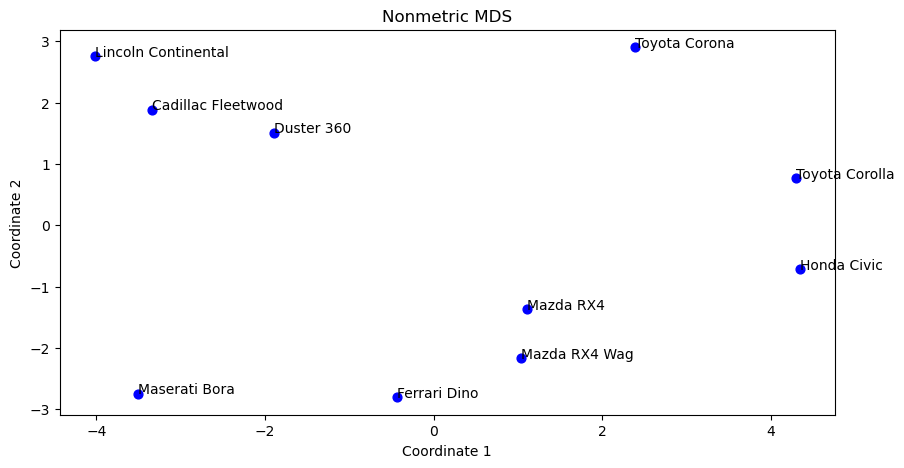

In [8]:
# 5. Plot the Nonmetric MDS results - A 2D visualization of the similarity/distance matrix.
plt.figure(figsize=(10, 5))
plt.scatter(x, y, c='blue', marker='o', s=40)
for i, label in enumerate(data.index):
    plt.text(x[i], y[i], label, fontsize=10)
plt.title("Nonmetric MDS")
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.show()

## Step 5. Stress Evaluation.

The `stress_ attribute` in `MDS` captures the stress value. A loop calculates this for different dimensions (from 1 to 6) and visualizes the results. This part shows how stress depends upon dimensions.

c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set

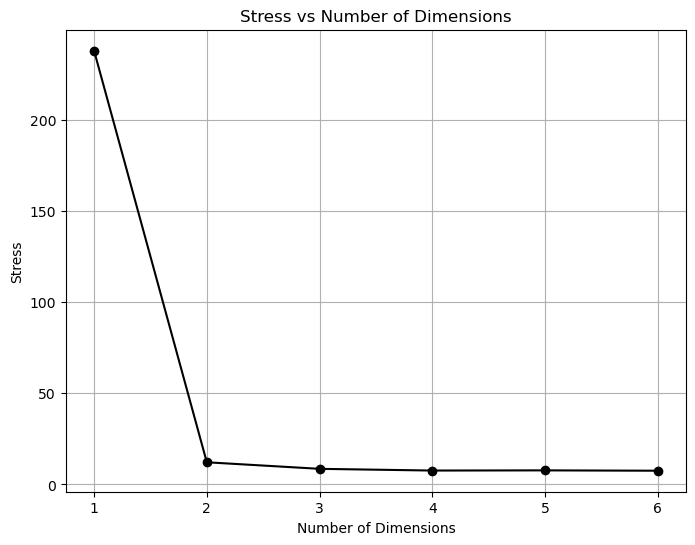

In [9]:
# 6. Stress over dimensions - Stress value are raw and unormalized
stresses = []
for k in range(1, 7):
    mds = MDS(n_components=k, max_iter=1000, dissimilarity='precomputed', random_state=42)
    mds.fit(d)
    stresses.append(mds.stress_)


# Plot stress vs. dimensions (Stress Plot) - A line plot showing how stress changes with the number of dimensions.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), stresses, marker='o', linestyle='-', color='black')
plt.title("Stress vs Number of Dimensions")
plt.xlabel("Number of Dimensions")
plt.ylabel("Stress")
plt.grid()
plt.show()

c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set

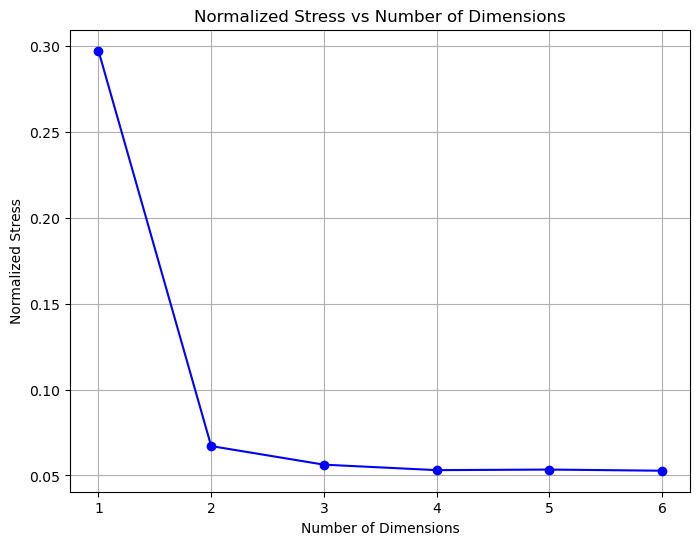

In [10]:
# Normalize stress values
stresses = []
for k in range(1, 7):
    mds = MDS(n_components=k, max_iter=1000, dissimilarity='precomputed', random_state=42)
    mds.fit(d)
    stresses.append(mds.stress_)

normalized_stresses = [
    np.sqrt(stress / np.sum(d ** 2))
    for stress in stresses
]

# Plot normalized stress
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), normalized_stresses, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Dimensions")
plt.ylabel("Normalized Stress")
plt.title("Normalized Stress vs Number of Dimensions")
plt.grid()
plt.show()
